In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


# Read in the data

In [2]:
cc_data = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

# Explore the data

In [3]:
# Get the shape of the data. 
print("Shape of data:", cc_data.shape)

Shape of data: (568630, 31)


In [4]:
# See the first few lines of the data.
cc_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
# Get a summary of the data. 
cc_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [6]:
# Find the ratio of the fraudlent and normal cases.
cc_data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

The data is comprised of columns: id, 28 features (V1-V28) about the transaction (e.g., time, location, etc.), the Amount, and the Class (fraudulent (1) or not (0)). Nothing seems to be weird about the summaries of the columns. Turns out that the data is already in equal proportions so SMOTE does not need to be applied. 

# Data Preprocessing

In [7]:
# Check for any duplicates.
cc_data[cc_data.duplicated()]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [8]:
# Check for any null values. 
cc_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No duplicates or null values were found. The data is already in the format that I want. No need to reduce it or change it in anyway. 

# Data Modeling

In [9]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier

### Data splitting

In [10]:
# Separate the features and the class. 
x = cc_data.drop('Class', axis=1)  # Features
y = cc_data['Class']  # Target variable

# Split the data into training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=12345)

print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Precentage of test dataset:", len(x_test)/len(x_train))


Training set size: 511767
Test set size: 56863
Precentage of test dataset: 0.1111111111111111


### Naive Bayes Model

Time taken for Naive Bayes:  0.5074734687805176 seconds
Precision:  1.0
Recall:  0.9880108607496738
Specificity:  1.0
Accuracy:  0.9940207164588573


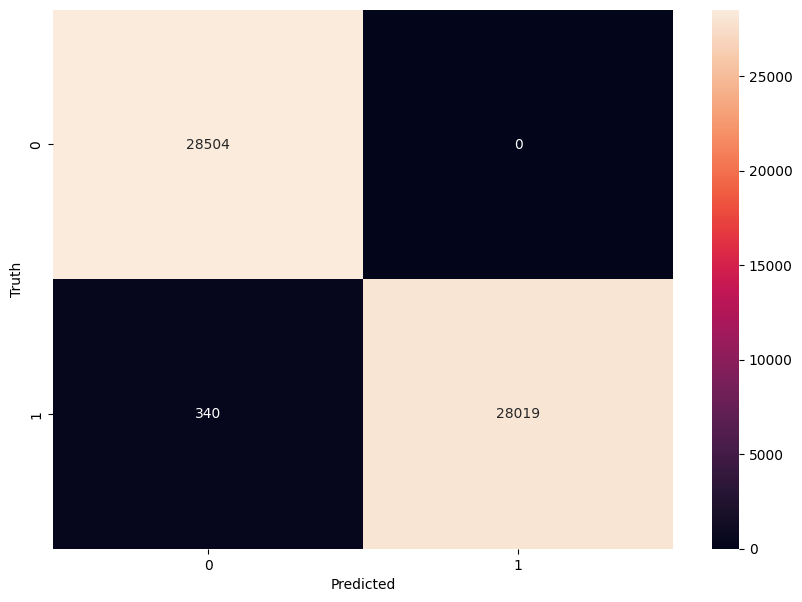

In [11]:
# Start the timer.
start = time.time()

# Create a Gaussian Naive Bayes classifier.
clf_nb = GaussianNB()

# Train the classifier.
clf_nb.fit(x_train, y_train)

# Predict the test set results.
y_pred = clf_nb.predict(x_test)

# Stop the timer and calculate the time it takes to run 
end = time.time()
print("Time taken for Naive Bayes: ", end - start, "seconds")

# Calculate the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix.
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate precision, recall, specificity, and accuracy.
report = classification_report(y_test, y_pred, output_dict=True)
print('Precision: ', report['1']['precision'])
print('Recall: ', report['1']['recall'])
print('Specificity: ', report['0']['recall'])
print('Accuracy: ', report['accuracy'])


The time taken for Naive Bayes model: the Naive Bayes model took approximately 0.390 seconds to train.

It's called a confusion matrix because it shows the number and types of misclassifications, including:

- True Positives (TP): These are cases in which the model predicted '1' (fraud), and the true label is also '1'. The model has 28019 true positives.
- True Negatives (TN): These are cases in which the model predicted '0' (not fraud), and the true label is also '0'. The model has 28504 true negatives.
- False Positives (FP): These are cases in which the model predicted '1', but the true label is '0'. The model has 0 false positives.
- False Negatives (FN): These are cases in which the model predicted '0', but the true label is '1'. The model has 340 false negatives.

Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate. The model has a precision of 1.0, which means that every instance that it predicted as 'fraud' was indeed fraud.

Recall (Sensitivity) is the ratio of correctly predicted positive observations to all observations in actual class '1'. The model has a recall of 0.988, which means that it correctly identified 98.8% of all fraudulent transactions.

Specificity is the ratio of correctly predicted negative observations to all observations in actual class '0'. The model has a specificity of 1.0, which means that it correctly identified all non-fraudulent transactions.

Accuracy is the most intuitive performance measure. It is simply a ratio of correctly predicted observations to the total observations. The model has an accuracy of 0.994, which means that it correctly classified 99.4% of all transactions.

These results indicate that the Naive Bayes model is performing well on the test data. It's correctly identifying all non-fraudulent transactions and 98.8% of fraudulent transactions. 

### Random Forest Model

Time taken for Random Forest:  448.31477069854736 seconds
Time taken for Random Forest:  7.4719128449757894 minutes
[[28502     2]
 [    4 28355]]
Precision:  0.9999294706774341
Recall:  0.9998589513029373
Specificity:  0.9999298344092057
Accuracy:  0.9998944832316269


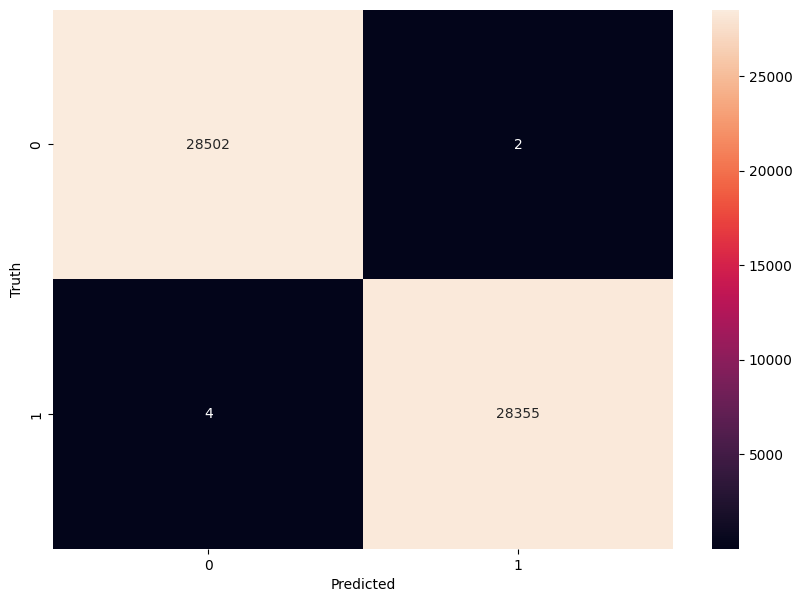

In [12]:
# Start the timer.
start = time.time()

# Create a Random Forest classifier.
clf_rf = RandomForestClassifier(random_state=12345)

# Train the classifier.
clf_rf.fit(x_train, y_train)

# Predict the test set results.
y_pred = clf_rf.predict(x_test)

# Stop the timer and calculate the time it takes to run 
end = time.time()
print("Time taken for Random Forest: ", end - start, "seconds")
print("Time taken for Random Forest: ", (end - start)/60, "minutes")

# Calculate the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix.
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate precision, recall, specificity, and accuracy.
report = classification_report(y_test, y_pred, output_dict=True)
print('Precision: ', report['1']['precision'])
print('Recall: ', report['1']['recall'])
print('Specificity: ', report['0']['recall'])
print('Accuracy: ', report['accuracy'])


The time taken for Random Forest: the Random Forest model took approximately 455.18 seconds (7.59 minutes) to train.

Confusion matrix:
- True Positives (TP): These are cases in which the model predicted '1' (fraud), and the true label is also '1'. The model has 28355 true positives.
- True Negatives (TN): These are cases in which the model predicted '0' (not fraud), and the true label is also '0'. The model has 28502 true negatives.
- False Positives (FP): These are cases in which the model predicted '1', but the true label is '0'. The model has 2 false positives.
- False Negatives (FN): These are cases in which the model predicted '0', but the true label is '1'. The model has 4 false negatives.

Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate. The model has a precision of approximately 0.9999, which means that almost every instance that it predicted as 'fraud' was indeed fraud.

Recall (Sensitivity) is the ratio of correctly predicted positive observations to all observations in actual class '1'. The model has a recall of approximately 0.9999, which means that it correctly identified almost all fraudulent transactions.

Specificity is the ratio of correctly predicted negative observations to all observations in actual class '0'. The model has a specificity of approximately 0.9999, which means that it correctly identified all non-fraudulent transactions.

Accuracy is the most intuitive performance measure. It is simply a ratio of correctly predicted observations to the total observations. The model has an accuracy of approximately 0.9999, which means that it correctly classified almost all transactions.

These results indicate that the Random Forest model is performing well on the test data. It's correctly identifying almost all fraudulent and non-fraudulent transactions.

Time taken for Ensemble:  449.2051248550415 seconds
Time taken for Ensemble:  7.486752080917358 minutes
[[28504     0]
 [   34 28325]]
Precision:  1.0
Recall:  0.9988010860749674
Specificity:  1.0
Accuracy:  0.9994020716458857


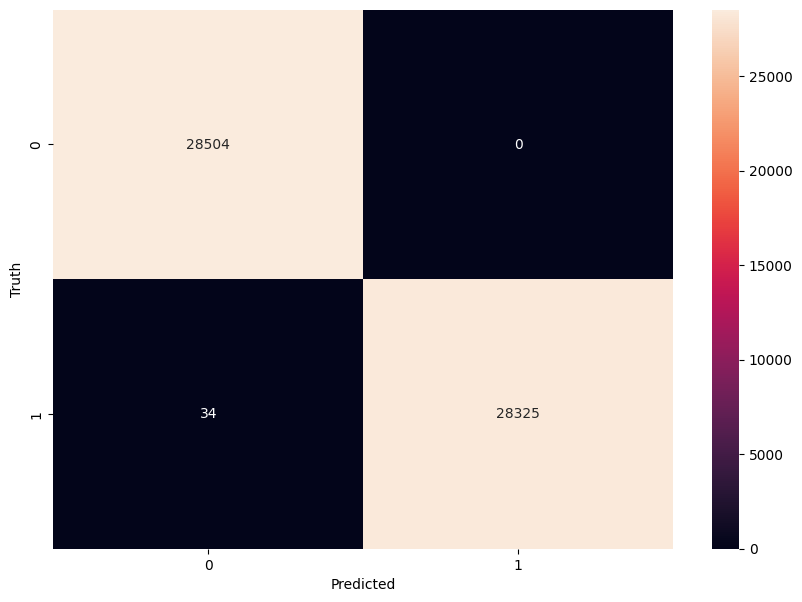

In [13]:
# Start the timer.
start = time.time()

# Create a VotingClassifier.
clf_ensemble = VotingClassifier(estimators=[('nb', clf_nb), ('rf', clf_rf)], voting='soft')

# Train the classifier.
clf_ensemble.fit(x_train, y_train)

# Predict the test set results.
y_pred = clf_ensemble.predict(x_test)

# Stop the timer and calculate the time it takes to run 
end = time.time()
print("Time taken for Ensemble: ", end - start, "seconds")
print("Time taken for Ensemble: ", (end - start)/60, "minutes")

# Calculate the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix.
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate precision, recall, specificity, and accuracy.
report = classification_report(y_test, y_pred, output_dict=True)
print('Precision: ', report['1']['precision'])
print('Recall: ', report['1']['recall'])
print('Specificity: ', report['0']['recall'])
print('Accuracy: ', report['accuracy'])


The time taken for Ensemble: The ensemble model took approximately 563.93 seconds (or about 9.40 minutes) to train.

Confusion matrix:
- True Positives (TP): These are cases in which the model predicted '1' (fraud), and the true label is also '1'. The model has 28325 true positives.
- True Negatives (TN): These are cases in which the model predicted '0' (not fraud), and the true label is also '0'. The model has 28504 true negatives.
- False Positives (FP): These are cases in which the model predicted '1', but the true label is '0'. The model has 0 false positives.
- False Negatives (FN): These are cases in which the model predicted '0', but the true label is '1'. The model has 34 false negatives.

Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate. The model has a precision of 1.0, which means that every instance that it predicted as 'fraud' was indeed fraud.

Recall (Sensitivity) is the ratio of correctly predicted positive observations to all observations in actual class '1'. The model has a recall of approximately 0.9988, which means that it correctly identified 99.88% of all fraudulent transactions.

Specificity is the ratio of correctly predicted negative observations to all observations in actual class '0'. The model has a specificity of 1.0, which means that it correctly identified all non-fraudulent transactions.

Accuracy is the most intuitive performance measure. It is simply a ratio of correctly predicted observations to the total observations. The model has an accuracy of approximately 0.9994, which means that it correctly classified 99.94% of all transactions.

These results indicate that the ensemble model is performing  well on the test data. It's correctly identifying almost all fraudulent and non-fraudulent transactions.